# Análise de resultados da pesquisa de Conhecimento das práticas de requisitos de software - Gov.BR

Este notebook faz a análise das respostas da pesquisa de Conhecimentos de Engenharia de Requisitos do programa Startup GOV.BR. Para isso, as seguintes ações serão realizadas:

- Recuperação das perguntas formuladas, para mapeamento das questões conforme o id do IMI
- Identificação de quais perguntas são reversas (Tp = R)
- Mapeamento das respostas para cada pergunta
- Separação das respostas dos questionários em três partes:
  - Questionário de Ambiente (QA): contém as perguntas abertas, que permitem identificar o ambiente que o especialista está alocado;
  - Questionário de Conhecimento (QC): Faz as perguntas que mensuram o nível de conhecimento do profissional em temas correlatos com a Engenharia de Requisitos
  - Questionário de Percepção (QP): Perguntas oriundas do IMI, que tem o objetivo de identificar os níveis de Interesse, Esfoço, Valor e Escolha Percebida
- Para as perguntas do Questionário de Percepção, cálculo do valor da resposta das perguntas reversas seguindo a fórmula: (Valor máximo Escala de Likert + 1 ) - Valor da resposta
- Cálculo da confiabilidade com o Alpha de Cronbach dos questionários QC e QP
- Cálculo da Média e Desvio Padrão
- Análise de correlações
- Rankeamento das respostas

## Importação das bibliotecas

Utilizaremos as seguintes bibliotecas:
- pandas: Permite criar DataFrames a partir dos arquivos Excel
- numpy: Biblioteca estatítica do Python
- pingouin: Lib que permite o cálculo do Alpha de Cronbach
- matplotlib e seaborn: Bibliotecas que permitem plotar gráficos

In [265]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns


## Recuperação das perguntas

Abriremos o arquivo `perguntas-questionario.xlsx` para criar os DataFrames:

In [266]:
dfPerguntasFiltradas = pd.read_excel('arquivos/perguntas-questionario.xlsx', sheet_name='Estrutura Perguntas')
display(dfPerguntasFiltradas)

,id,tipo,escala,tp,fase,pergunta
0,1,QA,NaN,NaN,NaN,Qual o seu papel na equipe de desenvolvimento?
1,2,QA,NaN,NaN,NaN,Em qual projeto você está alocado atualmente?
2,3,QA,NaN,NaN,NaN,Em qual fase está o seu projeto?
3,4,QA,NaN,NaN,NaN,Qual o modelo de desenvolvimento do seu projeto?
4,5,QA,NaN,NaN,NaN,Qual o modelo de desenvolvimento empregado nes...
5,6,QA,NaN,NaN,NaN,Como você gerenciar os requisitos do seu projeto?
6,7,QA,NaN,NaN,NaN,Como você elicita os requisitos do seu projeto?
7,8,QA,NaN,NaN,NaN,Há alguma metodologia de Requisitos que você ...
8,9,QA,NaN,NaN,NaN,Qual o motivo de não aplicar? (Opcional)
9,10,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...


## Recuperação das respostas

Faremos agora o carregamento das respostas enviadas do formulário:

In [267]:
dfRespostas = pd.read_excel('arquivos/respostas.xlsx')
display(dfRespostas)

,Carimbo de data/hora,Qual o seu papel na equipe de desenvolvimento?,Em qual projeto você está alocado atualmente?,Em qual fase está o seu projeto?,Qual o modelo de desenvolvimento do seu projeto?,Qual o modelo de desenvolvimento empregado nesse projeto?,Como você gerenciar os requisitos do seu projeto?,Como você elicita os requisitos do seu projeto?,Há alguma metodologia de Requisitos que você conheça e não aplique? Qual? (Opcional),Qual o motivo de não aplicar? (Opcional),...,"Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [É necessário um esforço considerável para fazer atividades de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Gerenciar requisitos contém atividades que eu não conseguiria fazer muito bem]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Eu me esforço bastante para aplicar as atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Sou razoavelmente competente nas atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não preciso prestar atenção ao processo de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que aplicar as práticas de gestão de requisitos é útil para entregar software de qualidade]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não me esforço muito para ter um bom desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que o processo de gestão de requisitos é monótono]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Estou satisfeito com o meu desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Creio que realizar as atividades de gestão de requisitos é importante porque ela pode ajudar a entregar melhores funcionalidades]"
0,2022-12-21 21:12:01.673,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,...,4,1,3,4,1,4,1,2,3,5
1,2022-12-21 23:37:52.570,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,...,4,2,2,4,1,5,3,2,3,5
2,2022-12-22 07:47:17.639,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,...,4,3,4,4,1,5,1,1,3,5
3,2022-12-22 08:03:14.745,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,...,3,1,2,5,4,5,1,3,3,5
4,2022-12-22 08:10:25.242,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,...,3,3,3,3,1,5,2,2,2,4
5,2022-12-22 08:59:23.372,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento

In [268]:
dfRespostas = dfRespostas.drop(columns=['Carimbo de data/hora'])
display(dfRespostas)

,Qual o seu papel na equipe de desenvolvimento?,Em qual projeto você está alocado atualmente?,Em qual fase está o seu projeto?,Qual o modelo de desenvolvimento do seu projeto?,Qual o modelo de desenvolvimento empregado nesse projeto?,Como você gerenciar os requisitos do seu projeto?,Como você elicita os requisitos do seu projeto?,Há alguma metodologia de Requisitos que você conheça e não aplique? Qual? (Opcional),Qual o motivo de não aplicar? (Opcional),Qual seu nível de conhecimento acerca dos temas abaixo? [Backlog de um produto],...,"Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [É necessário um esforço considerável para fazer atividades de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Gerenciar requisitos contém atividades que eu não conseguiria fazer muito bem]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Eu me esforço bastante para aplicar as atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Sou razoavelmente competente nas atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não preciso prestar atenção ao processo de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que aplicar as práticas de gestão de requisitos é útil para entregar software de qualidade]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não me esforço muito para ter um bom desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que o processo de gestão de requisitos é monótono]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Estou satisfeito com o meu desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Creio que realizar as atividades de gestão de requisitos é importante porque ela pode ajudar a entregar melhores funcionalidades]"
0,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,5,...,4,1,3,4,1,4,1,2,3,5
1,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,5,...,4,2,2,4,1,5,3,2,3,5
2,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,4,...,4,3,4,4,1,5,1,1,3,5
3,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,5,...,3,1,2,5,4,5,1,3,3,5
4,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,5,...,3,3,3,3,1,5,2,2,2,4
5,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos é f...,Backlog de produto,Não há uma técnica específica.,NaN

Uma pergunta duplicada foi inserida no formulário, e gerou respostas diferentes para a mesma pessoa. Sendo assim, para que o formulário fique íntegro, optamos por retirar as respostas da análise. A pergunta em questão se refere ao BDD:

In [269]:
# dfRespostas = dfRespostas.drop(columns=['Qual seu nível de conhecimento acerca dos temas abaixo?  [Behavior Driven Development (BDD)]'])
# display(dfRespostas)

dfRespostas = dfRespostas[dfRespostas.columns.drop(list(dfRespostas.filter(regex='BDD')))]
display(dfRespostas)
# dfRespostas.shape()

,Qual o seu papel na equipe de desenvolvimento?,Em qual projeto você está alocado atualmente?,Em qual fase está o seu projeto?,Qual o modelo de desenvolvimento do seu projeto?,Qual o modelo de desenvolvimento empregado nesse projeto?,Como você gerenciar os requisitos do seu projeto?,Como você elicita os requisitos do seu projeto?,Há alguma metodologia de Requisitos que você conheça e não aplique? Qual? (Opcional),Qual o motivo de não aplicar? (Opcional),Qual seu nível de conhecimento acerca dos temas abaixo? [Backlog de um produto],...,"Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [É necessário um esforço considerável para fazer atividades de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Gerenciar requisitos contém atividades que eu não conseguiria fazer muito bem]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Eu me esforço bastante para aplicar as atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Sou razoavelmente competente nas atividades de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não preciso prestar atenção ao processo de gerenciar requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que aplicar as práticas de gestão de requisitos é útil para entregar software de qualidade]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Não me esforço muito para ter um bom desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Acho que o processo de gestão de requisitos é monótono]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Estou satisfeito com o meu desempenho nas práticas de gestão de requisitos]","Percepções sobre gestão de requisitos. 1 indica que você discorda totalmente e 5, que você concorda completamente. [Creio que realizar as atividades de gestão de requisitos é importante porque ela pode ajudar a entregar melhores funcionalidades]"
0,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,5,...,4,1,3,4,1,4,1,2,3,5
1,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,5,...,4,2,2,4,1,5,3,2,3,5
2,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,4,...,4,3,4,4,1,5,1,1,3,5
3,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,5,...,3,1,2,5,4,5,1,3,3,5
4,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,5,...,3,3,3,3,1,5,2,2,2,4
5,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos é f...,Backlog de produto,Não há uma técnica específica.,NaN

Definição de funções que ajudarão a ajustar o DataFrame:

In [270]:
def getIdFromColumnName(valor:str, nomeDaColuna: str, df: pd.DataFrame)->int :
    row = df.loc[df[nomeDaColuna]== valor]
    return row.iloc[0]['id']

print(getIdFromColumnName("Como você elicita os requisitos do seu projeto?", 'pergunta', dfPerguntasFiltradas))


7


In [271]:
def getTpById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['tp']

def getPerguntaById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['pergunta']


print(getTpById('35',  dfPerguntasFiltradas))

R


Vamos modificar o nome das colunas para que correspondam ao ID do questionário IMI:

In [272]:
dfRespostasComId = dfRespostas.copy()
columnsDictionary = {}
for coluna in dfRespostas.columns:
    print(coluna)
    idColuna = str(getIdFromColumnName(coluna, 'pergunta', dfPerguntasFiltradas))
    columnsDictionary[coluna] = idColuna

print(columnsDictionary)
dfRespostasComId.rename(columns = columnsDictionary, inplace=True)
display(dfRespostasComId)

Qual o seu papel na equipe de desenvolvimento?
Em qual projeto você está alocado atualmente?
Em qual fase está o seu projeto?
Qual o modelo de desenvolvimento do seu projeto?
Qual o modelo de desenvolvimento empregado nesse projeto?
Como você gerenciar os requisitos do seu projeto?
Como você elicita os requisitos do seu projeto?
Há alguma metodologia de  Requisitos que você conheça e não aplique? Qual? (Opcional)
Qual o motivo de não aplicar? (Opcional)
Qual seu nível de conhecimento acerca dos temas abaixo?  [Backlog de um produto]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Conceito de "Preparado" e de "Pronto" ]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Confecção de cenários de testes de aceitação]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Critérios de aceitação de histórias de usuário]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Estratégias de gerenciamento de backlog (PBB, SAFe)]
Qual seu nível de conhecimento acerca dos 

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,5,...,4,1,3,4,1,4,1,2,3,5
1,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,5,...,4,2,2,4,1,5,3,2,3,5
2,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,4,...,4,3,4,4,1,5,1,1,3,5
3,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,5,...,3,1,2,5,4,5,1,3,3,5
4,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,5,...,3,3,3,3,1,5,2,2,2,4
5,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos é f...,Backlog de produto,Não há uma técnica específica.,NaN,Não faz parte do processo,4,...,3,3,4,3,3,4,3,2,3,4
6,Analista de Processos,Jornada do Estudante,2 e 3,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,1,...,1,1,1,4,1,4,1,1,4,4
7,Cientista de Dados,Jornada do Estudante,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Documentos de especificação de requisitos, His...",Lean Inception,NaN,NaN,2,...,3,3,3,4,1,5,3,2,3,5
8,Especialista em Segurança da Informação,Prescrição Eletrônica,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Não utiliza uma técnica específica., Casos de ...","Não há uma técnica específica., Product Backlo...",NaN,NaN,3,...,3,1,1,1,1,2,1,1,3,3
9,Outro,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Backlog de produto, Cenários em histórias de u...",Elaboração de protótipos,NaN,NaN,4,...,4,2,3,3,2,4,2,2,3,5


## Ajuste das perguntas reversas

Agora faremos os ajustes para as respostas que tem o Tp = 'R', o que indica que o valor deverá ser modificado para refletir a resposta ajustada. O primeiro passo será criar uma coluna com o valor da escala de Linkert utilizada (no nosso caso, 5) acrescido de 1, para que possamos subtrair essa coluna do nosso DataFrame:

In [273]:
# Criando uma coluna com valores 6 para permitir a subtração da coluna inteira
numeroRegistros =  dfRespostas.shape[0]
s = pd.Series(6)
listaComNumerosAjuste = s.repeat(numeroRegistros)
listaComNumerosAjuste = listaComNumerosAjuste.reset_index(drop=True)
print(listaComNumerosAjuste)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
20    6
21    6
22    6
23    6
24    6
25    6
26    6
27    6
dtype: int64


Após isso, inspecionaremos as colunas para identificar aquelas que devem ser revertidas, ou seja, que contenham o Tp = R na planilha de perguntas do IMI

In [274]:

dfRespostasAjustadas = dfRespostasComId.copy()
for col in dfRespostasAjustadas.columns:
    if (col.isdigit() and getTpById(col, dfPerguntasFiltradas) == 'R'):
        print('Coluna '+ col+ ' tem o Tp = R')
        dfRespostasAjustadas[col] = listaComNumerosAjuste - dfRespostasAjustadas[col]
print('Respostas originais')
display(dfRespostasComId)
print('Respostas ajustadas')
display(dfRespostasAjustadas)

Coluna 32 tem o Tp = R
Coluna 35 tem o Tp = R
Coluna 37 tem o Tp = R
Coluna 38 tem o Tp = R
Respostas originais


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,5,...,4,1,3,4,1,4,1,2,3,5
1,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,5,...,4,2,2,4,1,5,3,2,3,5
2,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,4,...,4,3,4,4,1,5,1,1,3,5
3,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,5,...,3,1,2,5,4,5,1,3,3,5
4,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,5,...,3,3,3,3,1,5,2,2,2,4
5,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos é f...,Backlog de produto,Não há uma técnica específica.,NaN,Não faz parte do processo,4,...,3,3,4,3,3,4,3,2,3,4
6,Analista de Processos,Jornada do Estudante,2 e 3,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,1,...,1,1,1,4,1,4,1,1,4,4
7,Cientista de Dados,Jornada do Estudante,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Documentos de especificação de requisitos, His...",Lean Inception,NaN,NaN,2,...,3,3,3,4,1,5,3,2,3,5
8,Especialista em Segurança da Informação,Prescrição Eletrônica,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Não utiliza uma técnica específica., Casos de ...","Não há uma técnica específica., Product Backlo...",NaN,NaN,3,...,3,1,1,1,1,2,1,1,3,3
9,Outro,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Backlog de produto, Cenários em histórias de u...",Elaboração de protótipos,NaN,NaN,4,...,4,2,3,3,2,4,2,2,3,5


Respostas ajustadas


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Documentos de especificação de requisitos,Não há uma técnica específica.,NaN,NaN,5,...,4,5,3,4,5,4,5,4,3,5
1,Gerente de Projetos,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,5,...,4,4,2,4,5,5,3,4,3,5
2,Gerente de Projetos,e-Notivisa,3 - Operação,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Backlog de produto, Cenários em histórias de u...",Product Backlog Building,NaN,NaN,4,...,4,3,4,4,5,5,5,5,3,5
3,Cientista de Dados,e-Notivisa,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,Backlog de produto,"Não há uma técnica específica., Product Backlo...",NaN,NaN,5,...,3,5,2,5,2,5,5,3,3,5
4,Analista de Processos,Ingresso de Família​s,2 - Desenvolvimento,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos e d...,"Casos de uso, Documentos de especificação de r...",Não há uma técnica específica.,NaN,Não faz parte do processo,5,...,3,3,3,3,5,5,4,4,2,4
5,Especialista em Infraestrutura,gov.br 360,3 - Operação,"Orientados a plano (Processo Unificado, Cascat...",Toda a etapa de levantamento de requisitos é f...,Backlog de produto,Não há uma técnica específica.,NaN,Não faz parte do processo,4,...,3,3,4,3,3,4,3,4,3,4
6,Analista de Processos,Jornada do Estudante,2 e 3,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,Não utiliza uma técnica específica.,Não há uma técnica específica.,NaN,NaN,1,...,1,5,1,4,5,4,5,5,4,4
7,Cientista de Dados,Jornada do Estudante,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Documentos de especificação de requisitos, His...",Lean Inception,NaN,NaN,2,...,3,3,3,4,5,5,3,4,3,5
8,Especialista em Segurança da Informação,Prescrição Eletrônica,2 - Desenvolvimento,"Ágil (Scrum, XP, por exemplo)",A Startup é responsável por todas as fases do ...,"Não utiliza uma técnica específica., Casos de ...","Não há uma técnica específica., Product Backlo...",NaN,NaN,3,...,3,5,1,1,5,2,5,5,3,3
9,Outro,ID Digital,3 - Operação,"Ágil (Scrum, XP, por exemplo)",Toda a etapa de levantamento de requisitos é f...,"Backlog de produto, Cenários em histórias de u...",Elaboração de protótipos,NaN,NaN,4,...,4,4,3,3,4,4,4,4,3,5


## Cálculo do Alpha de Cronbach


Faremos a validação de dois questionários: o Questionários de Conhecimento e o Questionário de Percepção. Sendo assim, vamos criar dois dataframes separados para cada conjunto de perguntas:

In [275]:
dfPerguntasQC = dfPerguntasFiltradas.query("tipo == 'QC' and pergunta.str.contains('BDD') == False")
display(dfPerguntasQC)

,id,tipo,escala,tp,fase,pergunta
9,10,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...
11,12,QC,NaN,NaN,Execução,Qual seu nível de conhecimento acerca dos tema...
12,13,QC,NaN,NaN,Execução,Qual seu nível de conhecimento acerca dos tema...
13,14,QC,NaN,NaN,Planejamento,Qual seu nível de conhecimento acerca dos tema...
14,15,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...
15,16,QC,NaN,NaN,Planejamento,Qual seu nível de conhecimento acerca dos tema...
16,17,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...
17,18,QC,NaN,NaN,Planejamento,Qual seu nível de conhecimento acerca dos tema...
18,19,QC,NaN,NaN,Planejamento,Qual seu nível de conhecimento acerca dos tema...
19,20,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...


In [276]:
dfPerguntasQP = dfPerguntasFiltradas.query("tipo == 'QP'")
display(dfPerguntasQP)

,id,tipo,escala,tp,fase,pergunta
29,30,QP,I,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...
30,31,QP,E,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...
31,32,QP,P,R,NaN,Percepções sobre gestão de requisitos. 1 indic...
32,33,QP,E,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...
33,34,QP,P,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...
34,35,QP,I,R,NaN,Percepções sobre gestão de requisitos. 1 indic...
35,36,QP,V,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...
36,37,QP,E,R,NaN,Percepções sobre gestão de requisitos. 1 indic...
37,38,QP,I,R,NaN,Percepções sobre gestão de requisitos. 1 indic...
38,39,QP,P,NaN,NaN,Percepções sobre gestão de requisitos. 1 indic...


In [277]:
dfPerguntasQMC = dfPerguntasFiltradas.query("tipo == 'QMC'")
display(dfPerguntasQMC)

,id,tipo,escala,tp,fase,pergunta
24,25,QMC,NaN,NaN,NaN,Qual seu nível de conhecimento acerca dos tema...
25,26,QMC,NaN,NaN,NaN,Qual seu nível de conhecimento acerca dos tema...
26,27,QMC,NaN,NaN,NaN,Qual seu nível de conhecimento acerca dos tema...
27,28,QMC,NaN,NaN,NaN,Qual seu nível de conhecimento acerca dos tema...
28,29,QMC,NaN,NaN,NaN,Qual seu nível de conhecimento acerca dos tema...


Faremos agora dois dataframes separados para as respostas com os ids das perguntas:

In [278]:
idsPerguntasQC = [str(x) for x in dfPerguntasQC["id"]]
# strings = [str(x) for x in ints] 
print(idsPerguntasQC)

['10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [279]:
dfRespostasQC = dfRespostasAjustadas[idsPerguntasQC]
display(dfRespostasQC)

,10,12,13,14,15,16,17,18,19,20,21,22,23
0,5,2,5,3,2,5,5,5,5,5,5,5,5
1,5,4,4,3,2,5,5,4,4,5,5,5,3
2,4,5,4,4,3,4,4,4,4,4,4,3,4
3,5,5,1,1,1,3,5,5,5,5,5,5,5
4,5,5,3,3,1,3,4,4,4,4,4,4,4
5,4,1,1,3,1,4,2,4,3,3,4,4,4
6,1,1,1,1,1,1,3,3,1,3,3,3,1
7,2,2,2,4,1,4,4,4,3,5,5,5,4
8,3,3,3,3,2,2,3,3,2,3,3,3,3
9,4,3,2,2,1,3,3,3,3,3,3,3,3


In [280]:
idsPerguntasQMC = [str(x) for x in dfPerguntasQMC["id"]]
# strings = [str(x) for x in ints] 
print(idsPerguntasQMC)

['25', '26', '27', '28', '29']


In [281]:
dfRespostasQMC = dfRespostasAjustadas[idsPerguntasQMC]
display(dfRespostasQMC)

,25,26,27,28,29
0,5,1,1,5,1
1,3,4,3,5,3
2,4,3,4,4,3
3,5,3,2,5,5
4,3,3,2,2,1
5,2,2,2,4,2
6,3,1,1,1,1
7,5,5,3,5,3
8,3,3,3,3,3
9,3,2,2,4,3


In [282]:
idsPerguntasQP = [str(x) for x in dfPerguntasQP["id"]]
# strings = [str(x) for x in ints] 
print(idsPerguntasQP)

['30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']


In [283]:
dfRespostasQP = dfRespostasAjustadas[idsPerguntasQP]
display(dfRespostasQP)

,30,31,32,33,34,35,36,37,38,39,40
0,4,4,5,3,4,5,4,5,4,3,5
1,3,4,4,2,4,5,5,3,4,3,5
2,3,4,3,4,4,5,5,5,5,3,5
3,3,3,5,2,5,2,5,5,3,3,5
4,3,3,3,3,3,5,5,4,4,2,4
5,5,3,3,4,3,3,4,3,4,3,4
6,4,1,5,1,4,5,4,5,5,4,4
7,4,3,3,3,4,5,5,3,4,3,5
8,3,3,5,1,1,5,2,5,5,3,3
9,4,4,4,3,3,4,4,4,4,3,5


In [284]:
dfRespostasQC.describe()

,10,12,13,14,15,16,17,18,19,20,21,22,23
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.892857,3.214286,3.071429,2.892857,2.178571,3.571429,3.892857,3.928571,3.642857,3.964286,4.035714,4.035714,3.714286
std,1.196887,1.499559,1.358882,1.286375,1.218790,1.288944,1.165532,1.152407,1.253566,1.201300,1.170063,1.104943,1.242970
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.750000,3.000000,3.000000,3.750000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [285]:
dfRespostasQMC.describe()

,25,26,27,28,29
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.750000,3.357143,2.714286,3.714286,2.642857
std,1.142609,1.366647,1.383960,1.383960,1.366647
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.750000,3.000000,1.750000
50%,4.000000,3.000000,3.000000,4.000000,2.500000
75%,5.000000,5.000000,4.000000,5.000000,3.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [286]:
dfRespostasQP.describe()

,30,31,32,33,34,35,36,37,38,39,40
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,4.035714,3.642857,3.678571,2.964286,3.571429,4.357143,4.392857,4.357143,4.285714,3.142857,4.535714
std,0.881167,0.951190,1.090483,1.231745,1.168366,1.061595,0.831745,0.911421,0.854493,0.848279,0.692935
min,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,4.500000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.250000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Alpha de Cronbach - QC

In [287]:
pg.cronbach_alpha(data=dfRespostasQC)

(0.9580751504855227, array([0.931, 0.978]))

Como o alpha deu acima de 0.9, pressupõe-se que há questões redundantes no questionário. Dessa forma, vamos varrer o questionário para identificar se há alguma pergunta que, ao ser eliminada, poderia melhorar o resultado do alpha. Para isso, vamos verificar a contribuição de cada pergunta, de forma a retirar aquelas que dão a maior contribuição para o indicador:

In [288]:
def dropColumnById(column:str, df:pd.DataFrame)->pd.DataFrame:
    return df.drop(columns=[column])


In [289]:
alphaComColunaEliminada = {}
for colunaParaEliminacao in idsPerguntasQC:
    df = dropColumnById(colunaParaEliminacao, dfRespostasQC.copy())
    alphaComColunaEliminada[colunaParaEliminacao] = pg.cronbach_alpha(data=df)[0]
sorted_alphaComColunaEliminada = sorted(alphaComColunaEliminada.items(), key=lambda x:x[1])
print(sorted_alphaComColunaEliminada)

[('19', 0.9514336246307105), ('18', 0.9518740506488741), ('16', 0.9524005977050568), ('23', 0.9524142154752797), ('20', 0.9531782664119339), ('21', 0.9531886024423337), ('22', 0.953199317957462), ('17', 0.9535698416480451), ('10', 0.9549869471744471), ('12', 0.9572431964355761), ('13', 0.9575157181969884), ('14', 0.9589400226329686), ('15', 0.9610643553735726)]


Agora, com a listagem ordenada de contribuições, retiraremos as perguntas nessa ordem, até que seja possível atingir um valor que seja imediatamente menor que o limite de 0.9. Isso indicará que não temos mais respostas redundantes:

In [290]:
alphaMax = pg.cronbach_alpha(data=dfRespostasQC)[0]
dfRespostasQCResultante = dfRespostasQC.copy()
perguntasRetiradas = []
for item in sorted_alphaComColunaEliminada:
    colunaDicionario = item[0]
    if (alphaMax > 0.9):
        perguntasRetiradas.append(colunaDicionario)
        dfRespostasQCResultante = dropColumnById(colunaDicionario, dfRespostasQCResultante)
        alphaMax = pg.cronbach_alpha(data=dfRespostasQCResultante)[0]
print ('Perguntas retiradas: ', perguntasRetiradas)
print('Alpha max: ', alphaMax)
display(dfRespostasQCResultante)

Perguntas retiradas:  ['19', '18', '16', '23', '20', '21']
Alpha max:  0.8894663797840932


,10,12,13,14,15,17,22
0,5,2,5,3,2,5,5
1,5,4,4,3,2,5,5
2,4,5,4,4,3,4,3
3,5,5,1,1,1,5,5
4,5,5,3,3,1,4,4
5,4,1,1,3,1,2,4
6,1,1,1,1,1,3,3
7,2,2,2,4,1,4,5
8,3,3,3,3,2,3,3
9,4,3,2,2,1,3,3


As seguintes perguntas foram retiradas:

In [291]:
for idPerguntaRetirada in perguntasRetiradas:
    print(getPerguntaById(idPerguntaRetirada, dfPerguntasQC))

Qual seu nível de conhecimento acerca dos temas abaixo?  [Planejamento do backlog de uma Sprint]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Identificação de problemas e necessidades dos usuários]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Histórias de usuário]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Sprint de desenvolvimento de solução]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Regras de negócio]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Requisitos Funcionais]


E as seguintes foram mantidas:

In [292]:
perguntasQCMantidas= list(set(idsPerguntasQC)-set(perguntasRetiradas))
print(perguntasQCMantidas)
for idPerguntaMantida in perguntasQCMantidas:
    print(getPerguntaById(idPerguntaMantida, dfPerguntasQC))

['22', '14', '12', '17', '15', '10', '13']
Qual seu nível de conhecimento acerca dos temas abaixo?  [Requisitos Não funcionais]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Critérios de aceitação de histórias de usuário]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Conceito de "Preparado" e de "Pronto" ]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Identificação de partes interessadas (stakeholders)]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Estratégias de gerenciamento de backlog (PBB, SAFe)]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Backlog de um produto]
Qual seu nível de conhecimento acerca dos temas abaixo?  [Confecção de cenários de testes de aceitação]


## Alpha de Cronbach - QMC

In [293]:
pg.cronbach_alpha(data=dfRespostasQMC)

(0.841016634957803, array([0.724, 0.918]))

### Alpha de Cronbach - QP

In [252]:
pg.cronbach_alpha(data=dfRespostasQP)

(0.7271275441565769, array([0.549, 0.855]))

Como o Alpha deu maior de 0.7, não modificaremos o conjuntos de perguntas de QP

# Análise estatística

Com o resultado ajustado, podemos verificar algumas estatísticas do DataFrame

## Questionário de Conhecimento

In [253]:
dfRespostasQCResultante.describe()

,10,12,13,14,15,17,25,26,27,29
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.892857,3.214286,3.071429,2.892857,2.178571,3.892857,3.750000,3.357143,2.714286,2.642857
std,1.196887,1.499559,1.358882,1.286375,1.218790,1.165532,1.142609,1.366647,1.383960,1.366647
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.750000,1.750000
50%,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,2.500000
75%,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,4.000000,3.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No questionário de conhecimento, faremos o agrupamento dos conhecimento por fase

In [301]:
def getPerguntasDaFase(fase:str, df: pd.DataFrame)->list[str]:
    return df.query("fase==@fase and pergunta.str.contains('BDD') == False")['id']

In [331]:
dictFasesComPerguntas = {}
fasesUtilizadas = dfPerguntasQC['fase'].unique()
for fase in fasesUtilizadas:
    dictFasesComPerguntas.update({fase:getPerguntasDaFase(fase, dfPerguntasFiltradas)})
# for index, row in dfPerguntasFiltradas.iterrows():
print (dictFasesComPerguntas)

{'Diagnóstico': 9     10
14    15
16    17
19    20
20    21
21    22
Name: id, dtype: int64, 'Execução': 11    12
12    13
22    23
Name: id, dtype: int64, 'Planejamento': 13    14
15    16
17    18
18    19
Name: id, dtype: int64}


In [351]:
def calculaMediaDeRespostasDaFase(colunasPerguntas:list, dfRespostas:pd.DataFrame)->float:
    dfRespostasFase = dfRespostas.loc[:, dfRespostas.columns.isin(colunasPerguntas)]
    return dfRespostasFase.stack().mean()

def montaDataFrameMediaFases(colunasPerguntas:list, df:pd.DataFrame):
    mediasDasFases = []
    for fasePergunta in dictFasesComPerguntas.items():
        fase = fasePergunta[0]
        colunasPerguntas = map(str,fasePergunta[1].tolist())
        mediasDasFases.append([fase, calculaMediaDeRespostasDaFase(colunasPerguntas, df)])
    return pd.DataFrame(mediasDasFases, columns=['Fase', 'Média'])

In [352]:
dfMediaDasFases = montaDataFrameMediaFases(dictFasesComPerguntas, dfRespostasQC)
display (dfMediaDasFases)

,Fase,Média
0,Diagnóstico,3.666667
1,Execução,3.333333
2,Planejamento,3.508929


Vamos verificar agora, para cada papel, como esses níveis se comportam

In [353]:
idColunaPapel =str(getIdFromColumnName('Qual o seu papel na equipe de desenvolvimento?', 'pergunta', dfPerguntasFiltradas))
papeis = dfRespostasAjustadas[idColunaPapel].value_counts()
print (papeis)

Gerente de Projetos                        10
Analista de Processos                       5
Desenvolvedor de Soluções                   5
Cientista de Dados                          3
Especialista em Segurança da Informação     3
Especialista em Infraestrutura              1
Outro                                       1
Name: 1, dtype: int64


In [354]:
def createDFMediaFases(df:pd.DataFrame):
    return montaDataFrameMediaFases(dictFasesComPerguntas, df)

def describePapeis(perguntaColuna:str, df:pd.DataFrame, transformFunction):
    idColuna =str(getIdFromColumnName(perguntaColuna, 'pergunta', dfPerguntasFiltradas))
    valoresColuna = dfRespostasAjustadas[idColuna].value_counts()
    for valor in valoresColuna.items():
        descricao = valor[0] 
        contagem = valor[1]
        queryString = "`"+idColuna+"`=='"+descricao+"'"
        dfResultado = df.query(queryString)
        dfMedia = transformFunction(dfResultado)
        print(descricao, contagem)
        display(dfMedia)

In [355]:
describePapeis('Qual o seu papel na equipe de desenvolvimento?', dfRespostasComId, createDFMediaFases)

Gerente de Projetos 10


,Fase,Média
0,Diagnóstico,3.900000
1,Execução,3.633333
2,Planejamento,3.825000


Analista de Processos 5


,Fase,Média
0,Diagnóstico,3.466667
1,Execução,3.133333
2,Planejamento,3.200000


Desenvolvedor de Soluções 5


,Fase,Média
0,Diagnóstico,4.133333
1,Execução,3.933333
2,Planejamento,4.050000


Cientista de Dados 3


,Fase,Média
0,Diagnóstico,3.833333
1,Execução,2.888889
2,Planejamento,3.333333


Especialista em Segurança da Informação 3


,Fase,Média
0,Diagnóstico,2.777778
1,Execução,2.777778
2,Planejamento,2.500000


Especialista em Infraestrutura 1


,Fase,Média
0,Diagnóstico,3.0
1,Execução,2.0
2,Planejamento,3.5


Outro 1


,Fase,Média
0,Diagnóstico,2.833333
1,Execução,2.666667
2,Planejamento,2.750000


O resultado abaixo mostra como fica a média quando utilizamos apenas as perguntas que sobraram após a análise do Alpha

In [356]:
listaColunasQCComPapel = [idColunaPapel]
listaColunasQCComPapel.extend(perguntasQCMantidas)
print (listaColunasQCComPapel)
dfRespostasQCResultantesComPapel = dfRespostasAjustadas[listaColunasQCComPapel]

describePapeis('Qual o seu papel na equipe de desenvolvimento?', dfRespostasQCResultantesComPapel, createDFMediaFases)

['1', '22', '14', '12', '17', '15', '10', '13']
Gerente de Projetos 10


,Fase,Média
0,Diagnóstico,3.775
1,Execução,3.500
2,Planejamento,3.400


Analista de Processos 5


,Fase,Média
0,Diagnóstico,3.2
1,Execução,3.1
2,Planejamento,2.6


Desenvolvedor de Soluções 5


,Fase,Média
0,Diagnóstico,3.9
1,Execução,3.7
2,Planejamento,3.0


Cientista de Dados 3


,Fase,Média
0,Diagnóstico,3.416667
1,Execução,2.500000
2,Planejamento,2.333333


Especialista em Segurança da Informação 3


,Fase,Média
0,Diagnóstico,3.000000
1,Execução,2.666667
2,Planejamento,2.333333


Especialista em Infraestrutura 1


,Fase,Média
0,Diagnóstico,2.75
1,Execução,1.00
2,Planejamento,3.00


Outro 1


,Fase,Média
0,Diagnóstico,2.75
1,Execução,2.50
2,Planejamento,2.00


In [336]:
listaColunasQCCorrelacaoPapel = [idColunaPapel]
listaColunasQCCorrelacaoPapel.extend(perguntasQCMantidas)
print (listaColunasQCCorrelacaoPapel)
dfCorrelacaoPapelConhecimento = dfRespostasAjustadas[listaColunasQCCorrelacaoPapel]
display(dfCorrelacaoPapelConhecimento)

['1', '22', '14', '12', '17', '15', '10', '13']


,1,22,14,12,17,15,10,13
0,Gerente de Projetos,5,3,2,5,2,5,5
1,Gerente de Projetos,5,3,4,5,2,5,4
2,Gerente de Projetos,3,4,5,4,3,4,4
3,Cientista de Dados,5,1,5,5,1,5,1
4,Analista de Processos,4,3,5,4,1,5,3
5,Especialista em Infraestrutura,4,3,1,2,1,4,1
6,Analista de Processos,3,1,1,3,1,1,1
7,Cientista de Dados,5,4,2,4,1,2,2
8,Especialista em Segurança da Informação,3,3,3,3,2,3,3
9,Outro,3,2,3,3,1,4,2


## Questionário de Metodologia e Conceito

Vamos analisar agora, para cada papel, como ficou a performance do conhecimento de Metodologias e Conceitos


In [367]:
def createDFMediaQMC(df:pd.DataFrame):
    respostasQMC = df.loc[:, df.columns.isin(idsPerguntasQMC)]
    return respostasQMC.stack().mean()


In [368]:
listaColunasQMCComPapel = [idColunaPapel]
listaColunasQMCComPapel.extend(idsPerguntasQMC)
print (listaColunasQMCComPapel)
dfRespostasQMCComPapel = dfRespostasAjustadas[listaColunasQMCComPapel]

describePapeis('Qual o seu papel na equipe de desenvolvimento?', dfRespostasQMCComPapel, createDFMediaQMC)

['1', '25', '26', '27', '28', '29']
Gerente de Projetos 10


3.56

Analista de Processos 5


2.48

Desenvolvedor de Soluções 5


3.6

Cientista de Dados 3


3.3333333333333335

Especialista em Segurança da Informação 3


3.1333333333333333

Especialista em Infraestrutura 1


2.4

Outro 1


2.8

## Questionário de Percepção

Agora será feita a análise do questionário de percepção, segregando por papel

In [370]:
def getPerguntasDaEscala(escala:str, df: pd.DataFrame)->list[str]:
    return df.query("escala==@escala")['id']

def createDFMediaQP(df:pd.DataFrame):
    respostasQMC = df.loc[:, df.columns.isin(idsPerguntasQMC)]
    return respostasQMC.stack().mean()


In [377]:
dictEscalasComPerguntas = {}
escalasUtilizadas = dfPerguntasQP['escala'].unique()
for escala in escalasUtilizadas:
    dictEscalasComPerguntas.update({escala:getPerguntasDaEscala(escala, dfPerguntasFiltradas)})
print (dictEscalasComPerguntas)

{'I': 29    30
34    35
37    38
Name: id, dtype: int64, 'E': 30    31
32    33
36    37
Name: id, dtype: int64, 'P': 31    32
33    34
38    39
Name: id, dtype: int64, 'V': 35    36
39    40
Name: id, dtype: int64}


In [378]:
def calculaMediaDeRespostasDaEscala(colunasPerguntas:list, dfRespostas:pd.DataFrame)->float:
    dfRespostasEscala = dfRespostas[colunasPerguntas]
    return dfRespostasEscala.stack().mean()

In [379]:
def montaDataFrameMediaEscalas(df:pd.DataFrame):
    mediasDasEscalas = []
    for escalaPergunta in dictEscalasComPerguntas.items():
        escala = escalaPergunta[0]
        colunasPerguntas = map(str,escalaPergunta[1].tolist())
        mediasDasEscalas.append([escala, calculaMediaDeRespostasDaEscala(colunasPerguntas, df)])
    return pd.DataFrame(mediasDasEscalas, columns=['Escala', 'Média'])


In [380]:
listaColunasQPComPapel = [idColunaPapel]
listaColunasQPComPapel.extend(idsPerguntasQP)
print (listaColunasQPComPapel)
dfRespostasQPResultantesComPapel = dfRespostasAjustadas[listaColunasQPComPapel]

describePapeis('Qual o seu papel na equipe de desenvolvimento?', dfRespostasQPResultantesComPapel, montaDataFrameMediaEscalas)

['1', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']
Gerente de Projetos 10


,Escala,Média
0,I,4.133333
1,E,3.866667
2,P,3.633333
3,V,4.750000


Analista de Processos 5


,Escala,Média
0,I,4.400000
1,E,3.666667
2,P,3.533333
3,V,4.700000


Desenvolvedor de Soluções 5


,Escala,Média
0,I,4.533333
1,E,3.800000
2,P,3.600000
3,V,4.200000


Cientista de Dados 3


,Escala,Média
0,I,3.888889
1,E,3.222222
2,P,3.555556
3,V,4.666667


Especialista em Segurança da Informação 3


,Escala,Média
0,I,4.222222
1,E,3.222222
2,P,2.666667
3,V,3.500000


Especialista em Infraestrutura 1


,Escala,Média
0,I,4.000000
1,E,3.333333
2,P,3.000000
3,V,4.000000


Outro 1


,Escala,Média
0,I,4.000000
1,E,3.666667
2,P,3.333333
3,V,4.500000


In [376]:
dfRespostasQP.describe()

,30,31,32,33,34,35,36,37,38,39,40
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,4.035714,3.642857,3.678571,2.964286,3.571429,4.357143,4.392857,4.357143,4.285714,3.142857,4.535714
std,0.881167,0.951190,1.090483,1.231745,1.168366,1.061595,0.831745,0.911421,0.854493,0.848279,0.692935
min,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,4.500000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.250000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Correlação

Vamos tentar encontrar uma correlação entre o Questionário de Conhecimento, o Questionário de Metodologia e Conceito e o Questionário de Percepção. Para isso, montaremos um DataFrame com as colunas que fornecem um Alpha de Cronbach aceitável, e calcularemos as médias de cada um dos questionários. Após a montagem desse conjunto de dados, utilizaremos a Correlação de Pearson para avaliar os achados.

In [381]:

print(idColunaPapel)
listaColunasCorrelacaoPapel = [idColunaPapel]
listaColunasCorrelacaoPapel.extend(perguntasQCMantidas)
listaColunasCorrelacaoPapel.extend(idsPerguntasQMC)
listaColunasCorrelacaoPapel.extend(idsPerguntasQP)
print (listaColunasCorrelacaoPapel)
dfCorrelacaoConhecimentoMetodologiaPercepcao = dfRespostasAjustadas[listaColunasCorrelacaoPapel]
display(dfCorrelacaoConhecimentoMetodologiaPercepcao)

1
['1', '22', '14', '12', '17', '15', '10', '13', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']


,1,22,14,12,17,15,10,13,25,26,...,31,32,33,34,35,36,37,38,39,40
0,Gerente de Projetos,5,3,2,5,2,5,5,5,1,...,4,5,3,4,5,4,5,4,3,5
1,Gerente de Projetos,5,3,4,5,2,5,4,3,4,...,4,4,2,4,5,5,3,4,3,5
2,Gerente de Projetos,3,4,5,4,3,4,4,4,3,...,4,3,4,4,5,5,5,5,3,5
3,Cientista de Dados,5,1,5,5,1,5,1,5,3,...,3,5,2,5,2,5,5,3,3,5
4,Analista de Processos,4,3,5,4,1,5,3,3,3,...,3,3,3,3,5,5,4,4,2,4
5,Especialista em Infraestrutura,4,3,1,2,1,4,1,2,2,...,3,3,4,3,3,4,3,4,3,4
6,Analista de Processos,3,1,1,3,1,1,1,3,1,...,1,5,1,4,5,4,5,5,4,4
7,Cientista de Dados,5,4,2,4,1,2,2,5,5,...,3,3,3,4,5,5,3,4,3,5
8,Especialista em Segurança da Informação,3,3,3,3,2,3,3,3,3,...,3,5,1,1,5,2,5,5,3,3
9,Outro,3,2,3,3,1,4,2,3,2,...,4,4,3,3,4,4,4,4,3,5


Vamos agregar as colunas de Conhecimento, Metodologia e Percepção com as médias de cada valor, sendo que vamos manter , nas de Percepção, as Escalas do IMI


In [386]:
dfResultadoCorrelacao = pd.DataFrame([])
dfResultadoCorrelacao['papel']=dfCorrelacaoConhecimentoMetodologiaPercepcao['1']
dfResultadoCorrelacao['QC']=dfCorrelacaoConhecimentoMetodologiaPercepcao[perguntasQCMantidas].mean(axis=1)
dfResultadoCorrelacao['QMC']=dfCorrelacaoConhecimentoMetodologiaPercepcao[idsPerguntasQMC].mean(axis=1)
for escalaPerguntaCorrelacao in dictEscalasComPerguntas.items():
    dfResultadoCorrelacao['QP-'+escalaPerguntaCorrelacao[0]]=dfCorrelacaoConhecimentoMetodologiaPercepcao[map(str,escalaPerguntaCorrelacao[1].tolist())].mean(axis=1)
display(dfResultadoCorrelacao)

,papel,QC,QMC,QP-I,QP-E,QP-P,QP-V
0,Gerente de Projetos,3.857143,2.6,4.333333,4.000000,4.000000,4.5
1,Gerente de Projetos,4.000000,3.6,4.000000,3.000000,3.666667,5.0
2,Gerente de Projetos,3.857143,3.6,4.333333,4.333333,3.333333,5.0
3,Cientista de Dados,3.285714,4.0,2.666667,3.333333,4.333333,5.0
4,Analista de Processos,3.571429,2.2,4.000000,3.333333,2.666667,4.5
5,Especialista em Infraestrutura,2.285714,2.4,4.000000,3.333333,3.000000,4.0
6,Analista de Processos,1.571429,1.4,4.666667,2.333333,4.333333,4.0
7,Cientista de Dados,2.857143,4.2,4.333333,3.000000,3.333333,5.0
8,Especialista em Segurança da Informação,2.857143,3.0,4.333333,3.000000,3.000000,2.5
9,Outro,2.571429,2.8,4.000000,3.666667,3.333333,4.5


Vamos verificar a correlação geral existente, independente do papel:

In [395]:
def printCorrelacao(df:pd.DataFrame, titulo:str):
    dfCorrelacao = df.drop(columns='papel')
    correlacaoTotal = dfCorrelacao.corr()
    plt.figure(figsize=(8,8))
    plt.suptitle(titulo)
    sns.heatmap(correlacaoTotal, annot=True);
    

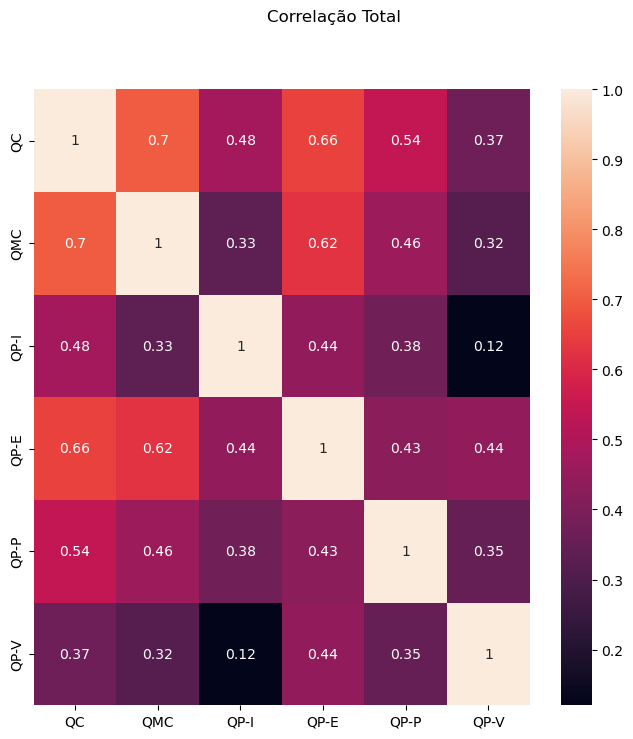

In [396]:
printCorrelacao(dfResultadoCorrelacao, 'Correlação Total')

Vamos fazer outra análise, onde verificaremos como essa correlação se comporta segregando os papeis

c:\Users\demet\anaconda3\envs\engreq\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\demet\anaconda3\envs\engreq\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\demet\anaconda3\envs\engreq\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\demet\anaconda3\envs\engreq\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


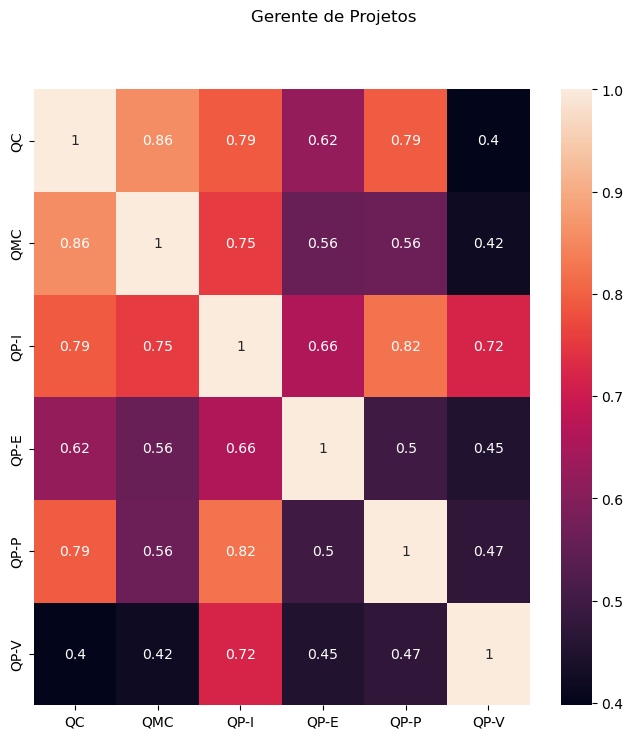

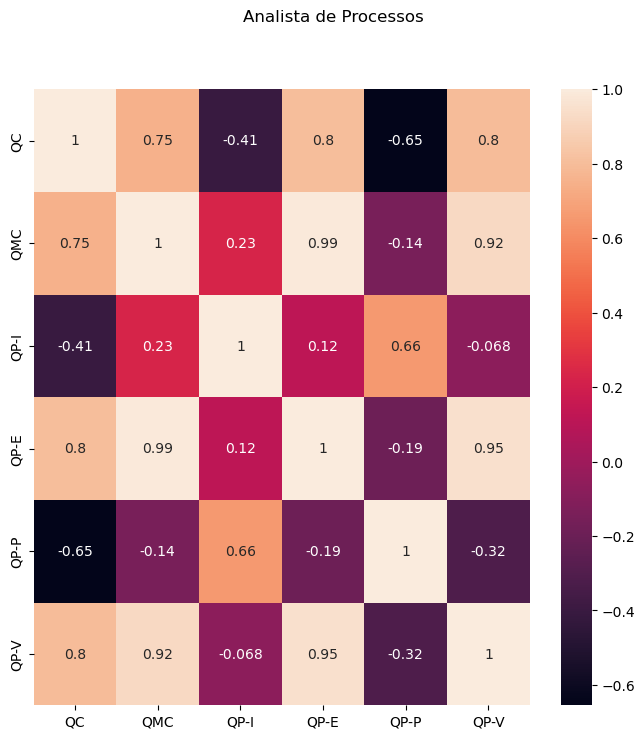

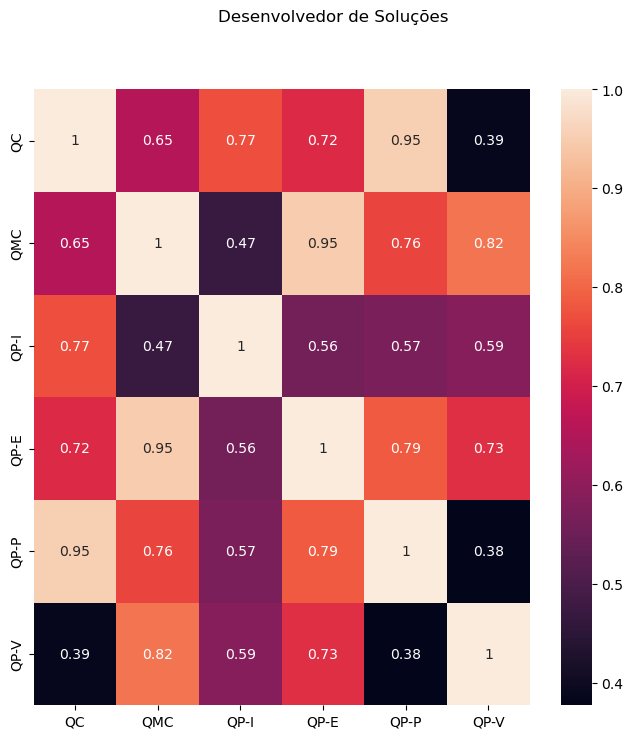

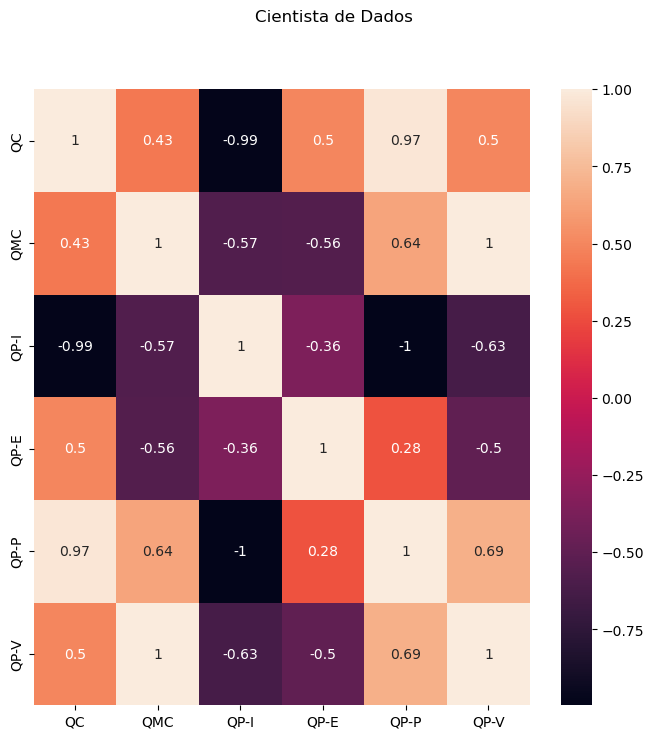

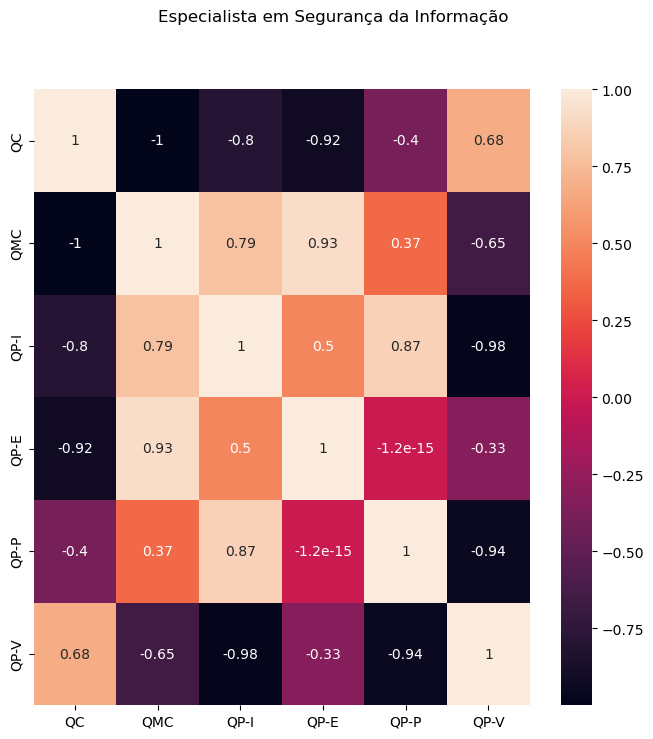

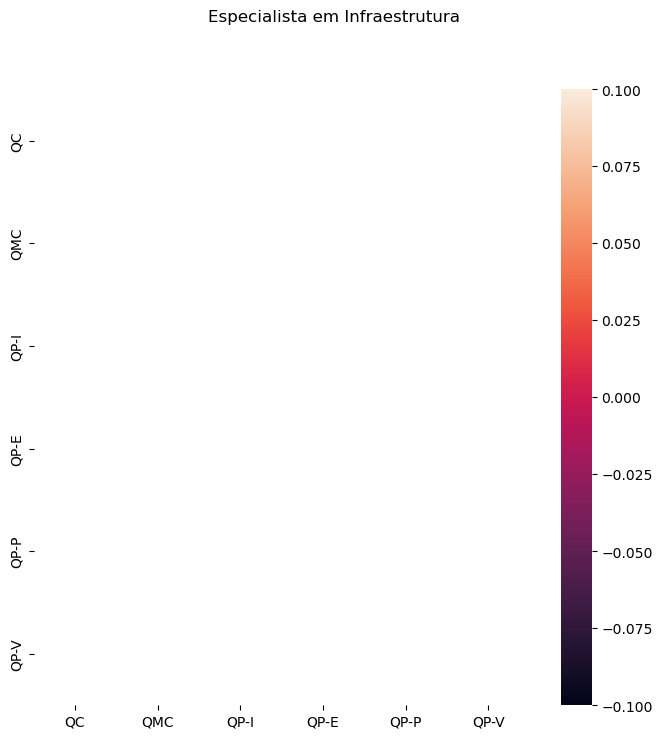

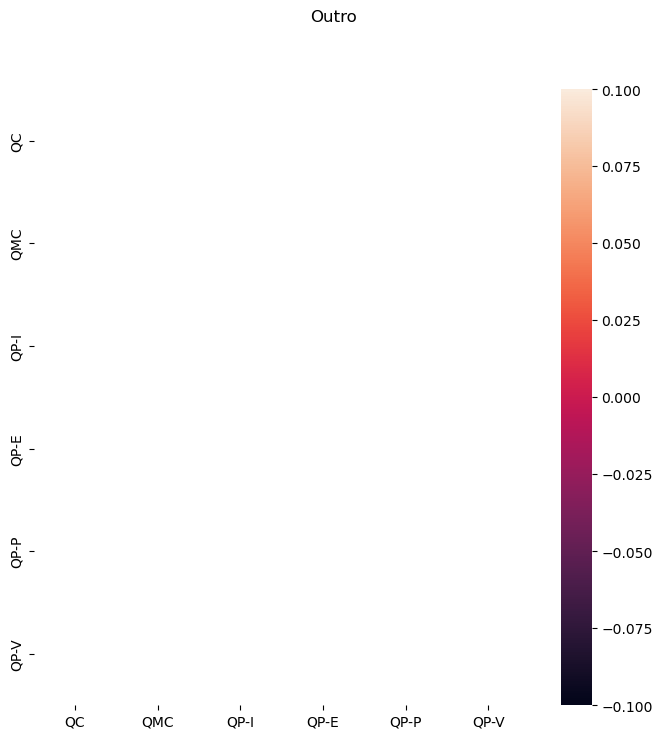

In [397]:
papeisCorrelacao = dfResultadoCorrelacao['papel'].value_counts().items()
for papelCorrelacao in papeisCorrelacao:
    papel = papelCorrelacao[0]
    dfCorrelacaoPapel = dfResultadoCorrelacao.query('papel==@papel')
    printCorrelacao(dfCorrelacaoPapel, papel)